In [1]:
# Import required Libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset and view
data = pd.read_csv(r"C:\Users\LENOVO\Downloads\Python\Deep Learning\Dataset\Bank Customer Churn Prediction.csv")
data.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Shape of the dataset
data.shape

(10000, 12)

In [4]:
# Describe the dataset
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# View the schema of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# check null values present in the dataset
# No null Values preset in the dataset
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
# Checking the duplicate values
data.duplicated().sum()

np.int64(0)

## (Exploratary Data Analysis) EDA

In [8]:
data.head(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


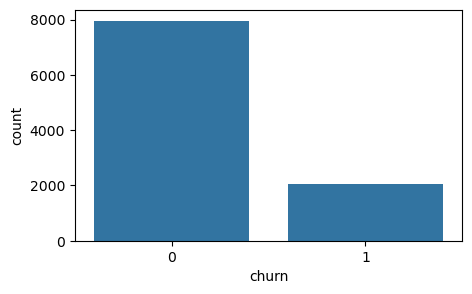

churn
0    79.63
1    20.37
Name: proportion, dtype: float64


In [9]:
# check target variable distribution
plt.figure(figsize=(5,3))
sns.countplot(data=data, x=data['churn'])
plt.show()


print(data['churn'].value_counts(normalize=True) * 100)

# Categorical Feature Analysis

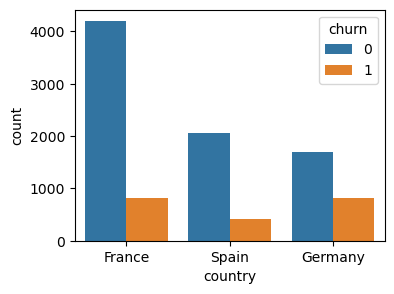

In [10]:
# Country wise chrun 
plt.figure(figsize=(4,3))
sns.countplot(data=data, x="country", hue="churn")
plt.show()

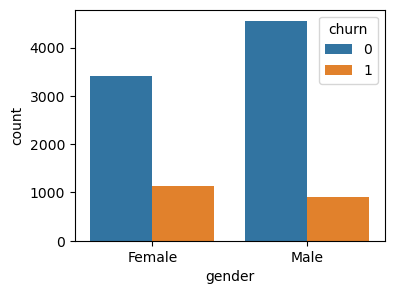

In [11]:
# Gender wise chrun 
plt.figure(figsize=(4,3))
sns.countplot(data=data, x="gender", hue="churn")
plt.show()

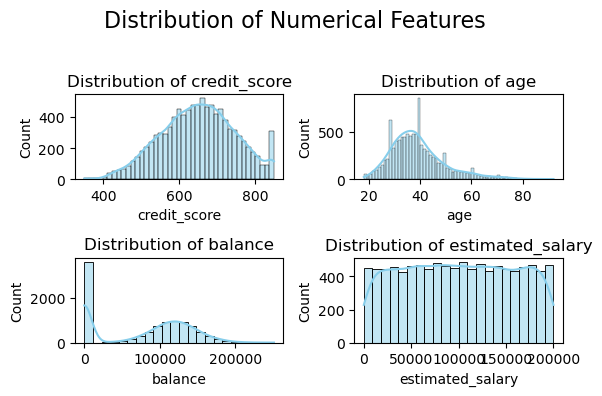

In [12]:
# Numerical Feature Distributions
num_cols = ['credit_score', 'age', 'balance', 'estimated_salary']
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

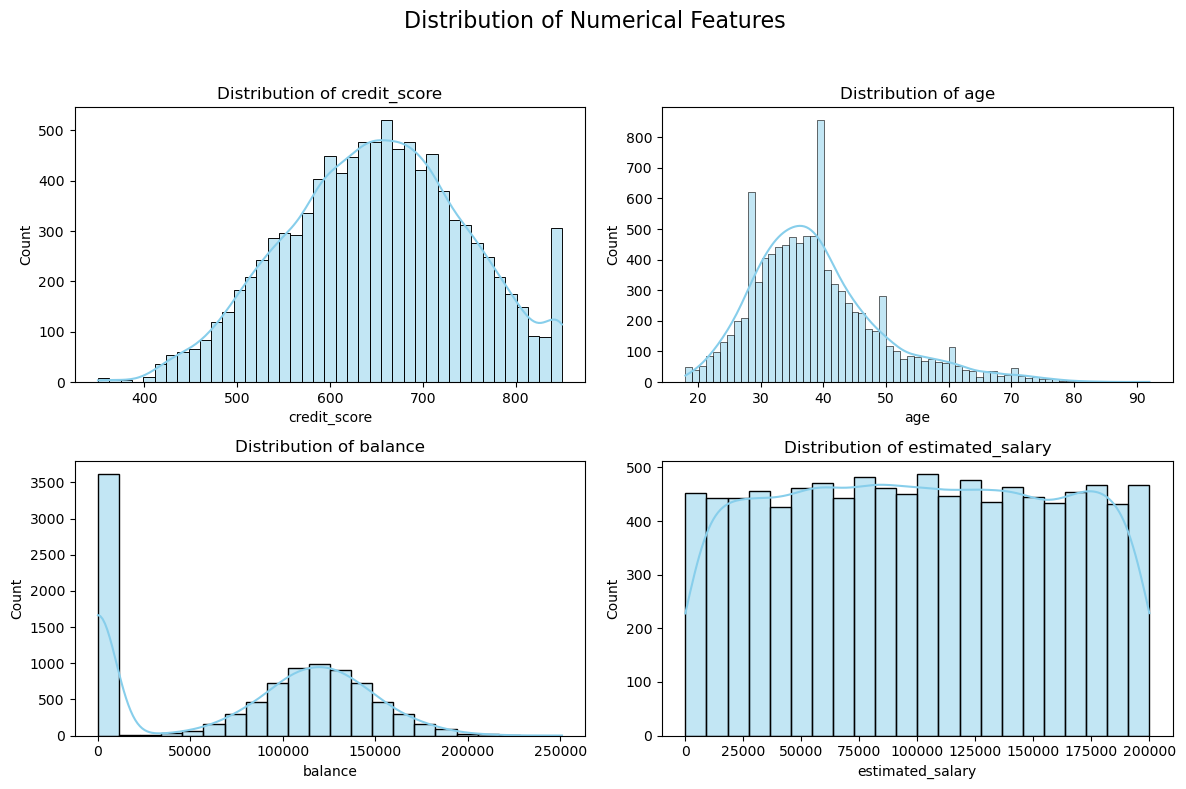

In [13]:
num_cols = ['credit_score', 'age', 'balance', 'estimated_salary']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

# Flatten the axes array for easy looping
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout so plots don't overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

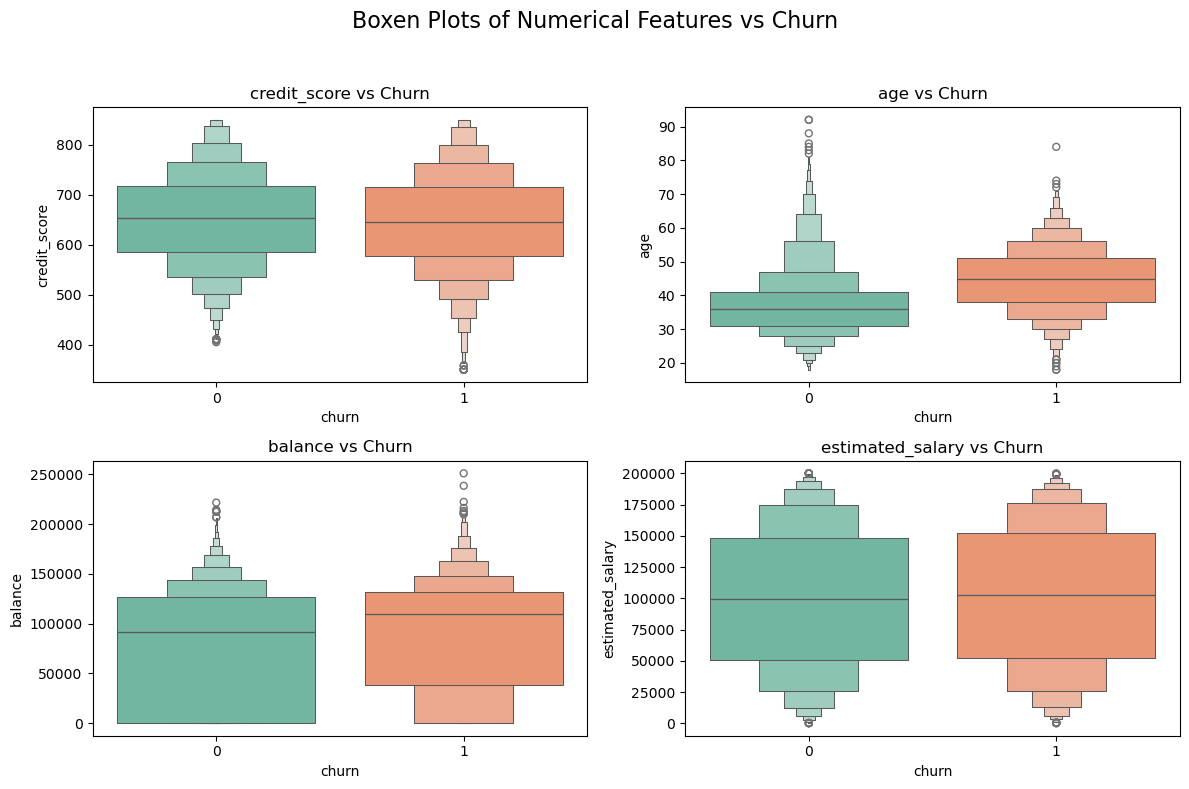

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Boxen Plots of Numerical Features vs Churn", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxenplot(data=data, x="churn", y=col, hue="churn", ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col} vs Churn")
    axes[i].legend_.remove() 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

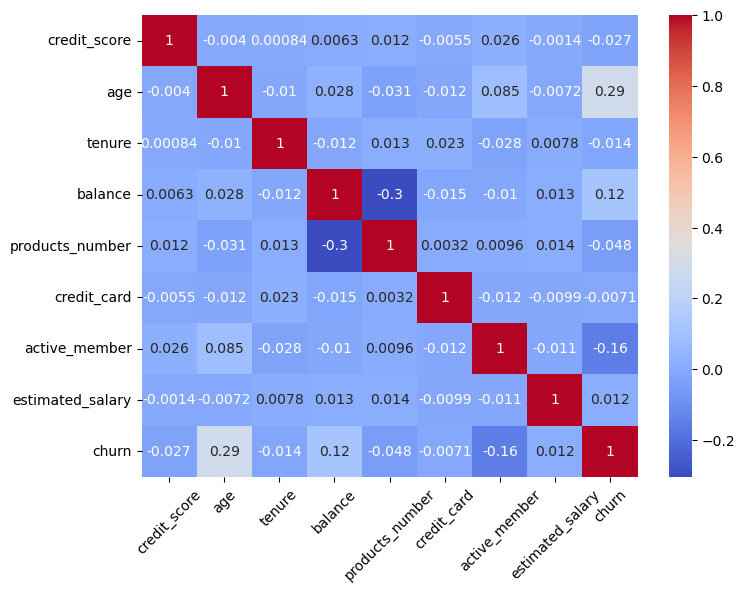

In [15]:
# Correlation Analysis
corr = data[['credit_score', 'age', 'tenure', 'balance', 
             'products_number', 'credit_card', 'active_member', 
             'estimated_salary', 'churn']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

# Customer Tenure & Product Analysis

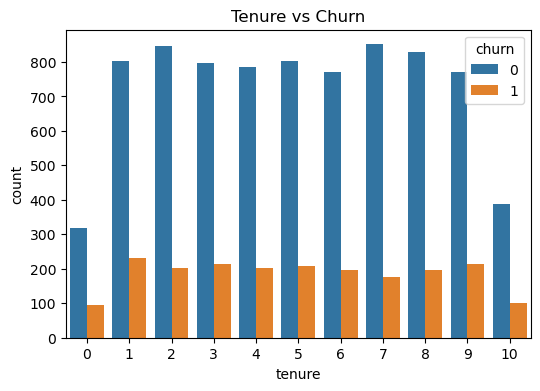

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='tenure', hue='churn', data=data)
plt.title("Tenure vs Churn")
plt.show()

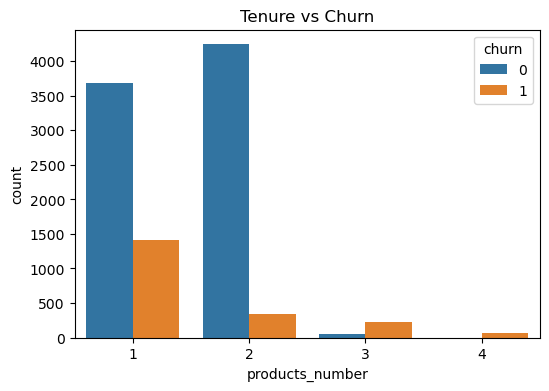

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='products_number', hue='churn', data=data)
plt.title("Tenure vs Churn")
plt.show()

# Credit Card & Active Member Status

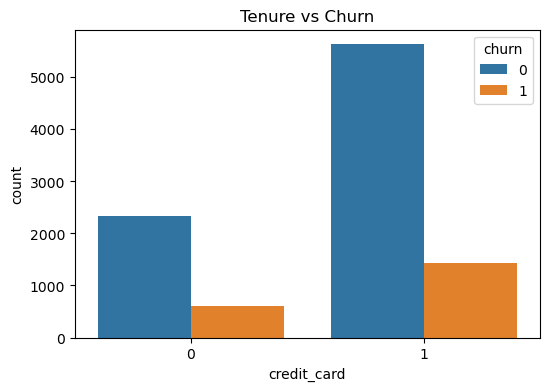

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='credit_card', hue='churn', data=data)
plt.title("Tenure vs Churn")
plt.show()

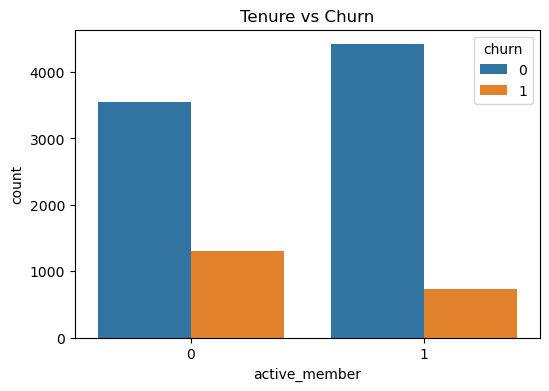

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='active_member', hue='churn', data=data)
plt.title("Tenure vs Churn")
plt.show()

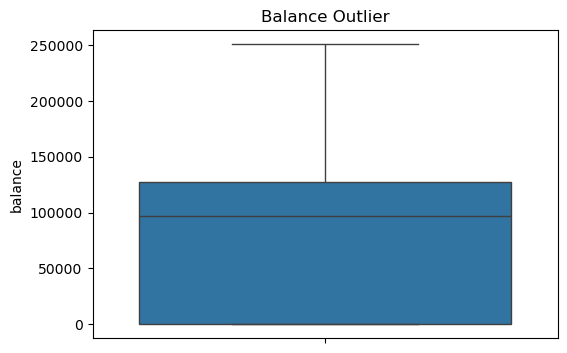

In [20]:
# Outlier Detection in balance column
plt.figure(figsize=(6,4))
sns.boxplot(data['balance'])
plt.title("Balance Outlier")
plt.show()

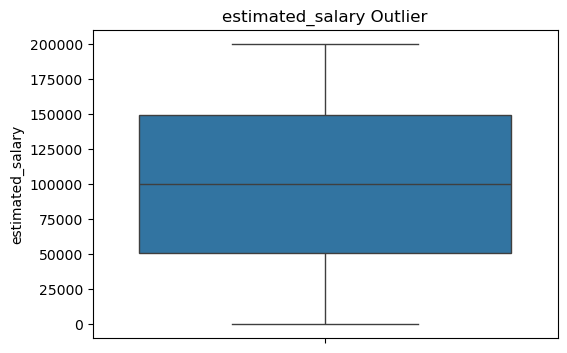

In [21]:
# Outlier Detection in salary column
plt.figure(figsize=(6,4))
sns.boxplot(data['estimated_salary'])
plt.title("estimated_salary Outlier")
plt.show()

# Data Preprocessing and transforming

In [22]:
data.head(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [23]:
data = data.drop(columns="customer_id")

In [24]:
# Split the data in input and output feature
x = data.iloc[:,:-1]
y = data['churn']

# Encoding the categorical column 

In [25]:
# do Label Encoding for gender column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['gender'] = le.fit_transform(x[["gender"]])

C:\Users\LENOVO\anaconda_envs\tf_env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# do one hot Encoding for country column
x = pd.get_dummies(x, columns=["country"], drop_first=True).astype(int)

# Spliting the model in Train and test 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handle outliers and scaling data

In [28]:
# First scale only the 'balance' column with RobustScaler
from sklearn.preprocessing import RobustScaler

rs = RobustScaler(quantile_range=(25.0, 75.0))
x_train['balance'] = rs.fit_transform(x_train[['balance']])

In [29]:
# Now scale all features (including 'balance') with StandardScaler
sc = StandardScaler()
x_scaled = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)

In [30]:
x_scaled.shape

(8000, 11)

# Building model

In [31]:
# Import required librery
import tensorflow
from keras.layers import Dense
from keras.models import Sequential

In [32]:
ann = Sequential()

In [33]:
ann.add(Dense(10, input_dim=11, activation="relu" ))
ann.add(Dense(8, activation="relu" ))
ann.add(Dense(6, activation="relu" ))
ann.add(Dense(4, activation="relu" ))
ann.add(Dense(2, activation="relu" ))
ann.add(Dense(1, activation="sigmoid" ))

C:\Users\LENOVO\anaconda_envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the ann model
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [35]:
# fir the model
ann.fit(x_scaled, y_train, batch_size=500, epochs=20)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2345 - loss: 1.4597
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3306 - loss: 1.0254 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4588 - loss: 0.8003 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5824 - loss: 0.7137 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6840 - loss: 0.6858 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7370 - loss: 0.6757 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7629 - loss: 0.6700 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7794 - loss: 0.6654 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.6613 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7974 - loss: 0.6574 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8016 - loss: 0.6536 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [36]:
# check performance on test data
loss, accuracy = ann.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4520 - loss: 17235.0547
Test Accuracy: 0.4520


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
# predict x_text
y_pred = ann.predict(x_test)
pred_data = []
for i in y_pred:
    if i > 0.5:
        pred_data.append(1)
    else:
        pred_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
# predict x_train
y_pred1 = ann.predict(x_train)
pred_data1 = []
for j in y_pred1:
    if j > 0.5:
        pred_data1.append(1)
    else:
        pred_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


In [40]:
# check the accuracy
accuracy_score(y_train, pred_data1)

0.7945

In [41]:
accuracy_score(y_test, pred_data)

0.452

In [42]:
import pickle

In [43]:
# Save ANN model
ann.save("churn_model.h5")

In [44]:
# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)

In [45]:
# Also save LabelEncoder for gender
with open("gender_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [50]:
data


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [52]:
x_scaled

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain
0,0.356500,0.913248,-0.655786,0.345680,-1.218470,0.808436,0.649203,0.974817,1.367674,-0.579467,-0.576388
1,-0.203898,0.913248,0.294938,-0.348369,0.696836,0.808436,0.649203,0.974817,1.661248,1.725723,-0.576388
2,-0.961472,0.913248,-1.416365,-0.695393,0.618622,-0.916688,0.649203,-1.025834,-0.252799,-0.579467,1.734942
3,-0.940717,-1.094993,-1.131148,1.386753,0.953220,-0.916688,0.649203,-1.025834,0.915394,-0.579467,-0.576388
4,-1.397337,0.913248,1.625953,1.386753,1.057452,-0.916688,-1.540351,-1.025834,-1.059592,-0.579467,-0.576388
...,...,...,...,...,...,...,...,...,...,...,...
7995,1.207474,0.913248,1.435808,1.039728,-0.102308,-0.916688,0.649203,0.974817,-0.539853,-0.579467,-0.576388
7996,0.314989,-1.094993,1.816097,-1.389442,-1.218470,-0.916688,0.649203,0.974817,-1.733882,-0.579467,-0.576388
7997,0.865009,-1.094993,-0.085351,-1.389442,-1.218470,2.533560,-1.540351,-1.025834,-0.142758,-0.579467,-0.576388
7998,0.159323,0.913248,0.390011,1.039728,1.827263,-0.916688,0.649203,-1.025834,-0.050818,-0.579467,-0.576388
